In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def newton_method(f, fp, x0, rel_error=1e-8, m=1, maxNumberIterations=100):
    #Initialization of hybrid error and absolute
    hybrid_error = 100
    error_i = np.inf
    
    # print('i |     x_i      |     x_{i+1}  |     |x_{i+1}-x_i|      |  e_{i+1}/e_i | e_{i+1}/e_i^2')
    # print('----------------------------------------------------------------------------------------')
    
    # Output table to store the numerical evolution of the algorithm
    output_table = []
    
    #Iteration counter
    i = 0
    while (hybrid_error > rel_error and hybrid_error < 1e12 and i<=maxNumberIterations):
        #Newton's iteration
        x1 = x0-m*f(x0)/fp(x0)
        
        #Checking if root was found
        if f(x1) == 0.0:
            hybrid_error = 0.0
            break
        
        #Computation of hybrid error
        hybrid_error = abs(x1-x0)/np.max([abs(x1),1e-12])
        
        #Computation of absolute error
        error_iminus1 = error_i
        error_i = abs(x1-x0)
        
        # Storing output data
        output_table.append([i,x0,x1,error_i,error_i/error_iminus1,error_i/(error_iminus1**((1+np.sqrt(5))/2.)),error_i/(error_iminus1**2)])
        
        #Updating solution
        x0 = x1
        #Increasing iteration counter
        i += 1
    
    # Showing final output table
    columns    = ['$i$', '$x_i$', '$x_{i+1}$', '$e_i$', r'$\frac{e_i}{e_{i-1}}$', r'$\frac{e_i}{e_{i-1}^\alpha}$', r'$\frac{e_i}{e_{i-1}^2}$']
    df = pd.DataFrame(data=output_table, columns=columns)
    display(df)
    
    #Checking if solution was obtained
    if hybrid_error < rel_error: 
        return x1
    elif i>=maxNumberIterations:
        print('Newton''s Method did not converge. Too many iterations!!')
        return None
    else:
        print('Newton''s Method did not converge!')
        return None

In [22]:
# Just plotting the Cobweb diagram: https://en.wikipedia.org/wiki/Cobweb_plot
def cobweb(x,g=None):
    min_x = np.amin(x)
    max_x = np.amax(x)
    
    plt.figure(figsize=(10,10))
    ax = plt.axes()
    plt.plot(np.array([min_x,max_x]),np.array([min_x,max_x]),'b-')
    for i in np.arange(x.size-1):
        delta_x = x[i+1]-x[i]
        head_length =  np.abs(delta_x)*0.04
        arrow_length = delta_x-np.sign(delta_x)*head_length
        ax.arrow(x[i], x[i], 0, arrow_length, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
        ax.arrow(x[i], x[i+1], arrow_length, 0, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
    
    if g!=None:
        y = np.linspace(min_x,max_x,1000)
        plt.plot(y,g(y),'r')
    
    plt.title('Cobweb diagram')
    plt.grid(True)
    plt.show()

# This code performs the fixed point iteration.
def fpi(g, x0, k, flag_cobweb=False):
    # This is where we store all the approximation, 
    # this is technically not needed but we store them because we need them for the cobweb diagram at the end.
    x = np.empty(k+1)
    # Just starting the fixed point iteration from the 'initial guess'
    x[0] = x0
    # Initializing the error in NaN
    error_i = np.nan
    
    # Output table to store the numerical evolution of the algorithm
    output_table = []
    
    # Main loop
    for i in range(k):
        # Iteration
        x[i+1] = g(x[i])
        # Storing error from previous iteration
        error_iminus1 = error_i
        # Computing error for current iteration.
        # Notice that from the theory we need to compute e_i=|x_i-r|, i.e. we need the root 'r'
        # but we don't have it, so we approximate it by 'x_{i+1}'.
        error_i = abs(x[i]-x[i+1])
        output_table.append([i,x[i],x[i+1],error_i,error_i/error_iminus1,error_i/(error_iminus1**((1+np.sqrt(5))/2.)),error_i/(error_iminus1**2)])
    
    # Showing final output table
    columns    = ['$i$', '$x_i$', '$x_{i+1}$', '$e_i$', r'$\frac{e_i}{e_{i-1}}$', r'$\frac{e_i}{e_{i-1}^\alpha}$', r'$\frac{e_i}{e_{i-1}^2}$']
    df = pd.DataFrame(data=output_table, columns=columns)
    display(df)
    
    # Just showing cobweb if required
    if flag_cobweb:
        cobweb(x,g)
    return x[-1]

In [23]:
import sympy as sym

def fpi_inversa(a):

    f = lambda x:  1/x
    fp = lambda x: -1/(x**2)

    r = newton_method(f, fp, a)

    print(r)
    
fpi_inversa(1)

,$i$,$x_i$,$x_{i+1}$,$e_i$,$\frac{e_i}{e_{i-1}}$,$\frac{e_i}{e_{i-1}^\alpha}$,$\frac{e_i}{e_{i-1}^2}$
0,0,1.000000e+00,2.000000e+00,1.000000e+00,0.0,0.000000e+00,0.000000e+00
1,1,2.000000e+00,4.000000e+00,2.000000e+00,2.0,2.000000e+00,2.000000e+00
2,2,4.000000e+00,8.000000e+00,4.000000e+00,2.0,1.303116e+00,1.000000e+00
3,3,8.000000e+00,1.600000e+01,8.000000e+00,2.0,8.490562e-01,5.000000e-01
4,4,1.600000e+01,3.200000e+01,1.600000e+01,2.0,5.532096e-01,2.500000e-01
...,...,...,...,...,...,...,...
96,96,7.922816e+28,1.584563e+29,7.922816e+28,2.0,4.232402e-18,5.048710e-29
97,97,1.584563e+29,3.169127e+29,1.584563e+29,2.0,2.757657e-18,2.524355e-29
98,98,3.169127e+29,6.338253e+29,3.169127e+29,2.0,1.796774e-18,1.262177e-29
99,99,6.338253e+29,1.267651e+30,6.338253e+29,2.0,1.170703e-18,6.310887e-30


Newtons Method did not converge. Too many iterations!!
None


## Solucion



,$i$,$x_i$,$x_{i+1}$,$e_i$,$\frac{e_i}{e_{i-1}}$,$\frac{e_i}{e_{i-1}^\alpha}$,$\frac{e_i}{e_{i-1}^2}$
0,0,0.700000,0.371000,3.290000e-01,NaN,NaN,NaN
1,1,0.371000,0.452954,8.195390e-02,0.249100,0.495180,0.757143
2,2,0.452954,0.475057,2.210271e-02,0.269697,1.265688,3.290836
3,3,0.475057,0.476188,1.131171e-03,0.051178,0.539848,2.315460
4,4,0.476188,0.476190,2.699877e-06,0.002387,0.158065,2.110025
5,5,0.476190,0.476190,1.530776e-11,0.000006,0.015674,2.100021
6,6,0.476190,0.476190,0.000000e+00,0.000000,0.000000,0.000000


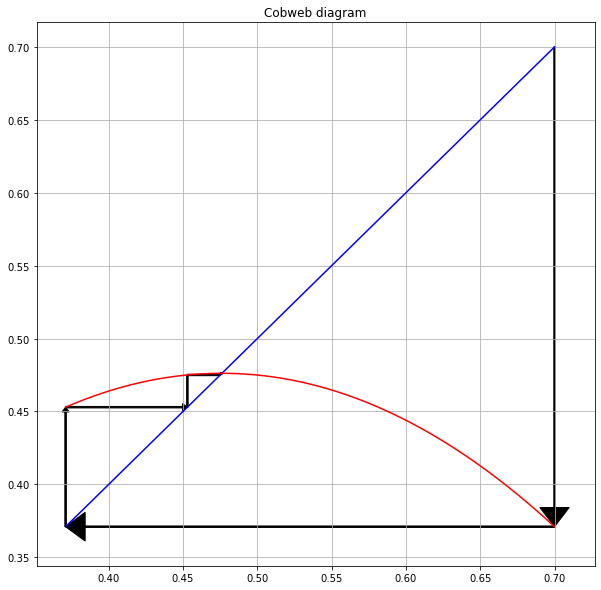

Reciprocal found : 0.47619047619047616
Reciprocal computed explicitly:  0.47619047619047616


In [26]:
# We are finding the 1/a
# Solution code:
a = 2.1
g = lambda x: 2*x-a*x**2
gp = lambda x: 2-2*a*x
r=fpi(g, 0.7, 7, flag_cobweb=True)
print('Reciprocal found :',r)
print('Reciprocal computed explicitly: ', 1/a)
# Are we seeing quadratic convergence?

### What is this plot telling us?

This plots shows that, even if we don't know the exact value of $g'(r)$, we can determine if the FPI will convergan by looking at the plot.
In this plot we observe that when plotting $g'(x)$ (magenta), we can determine that the value of $|g'(r)|$ will be less than 1 since it is between the black lines, that are located at $y=-1$ and $y=1$.

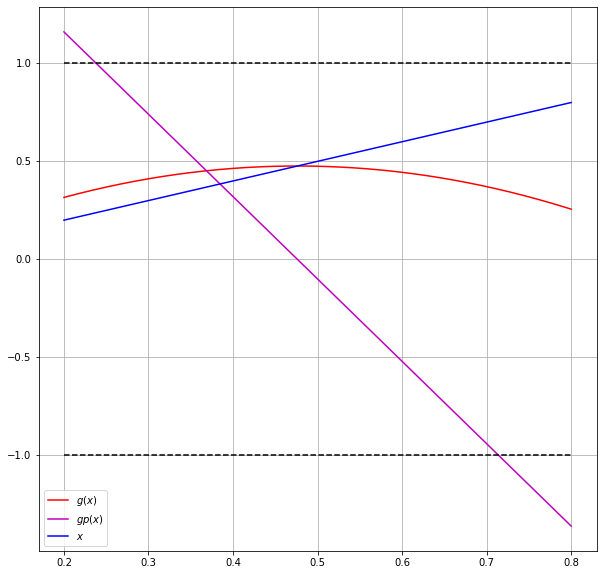

In [25]:
xx=np.linspace(0.2,0.8,1000)
plt.figure(figsize=(10,10))
plt.plot(xx,g(xx),'r-',label=r'$g(x)$')
plt.plot(xx,gp(xx),'m-',label=r'$gp(x)$')
plt.plot(xx,xx,'b-',label=r'$x$')
plt.plot(xx,0*xx+1,'k--')
plt.plot(xx,0*xx-1,'k--')
plt.legend(loc='best')
plt.grid()
plt.show()